In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_train=pd.read_csv(r'C:\Users\wlpch\Documents\sab\Credit Card Dataset for Clustering\CC GENERAL.csv')

In [3]:
data_train.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
print("Rows:",data_train.shape[0])
print("Columns:",data_train.shape[1])
print("Total missing values:",data_train.isnull().sum().values.sum())
print("\nUnique Values: \n",data_train.nunique())
print("\nMissing Values:\n",data_train.isnull().sum())

Rows: 8950
Columns: 18
Total missing values: 314

Unique Values: 
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

Missing Values:
 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEO

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
cols=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [7]:
data_train.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
def plthist(col_name):
    plt.figure(figsize=(12,6))
    plt.title(col_name)
    plt.hist(x=data_train[col_name])
    plt.plot()

In [9]:
data_corr=data_train.corr()
data_corr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


<AxesSubplot:>

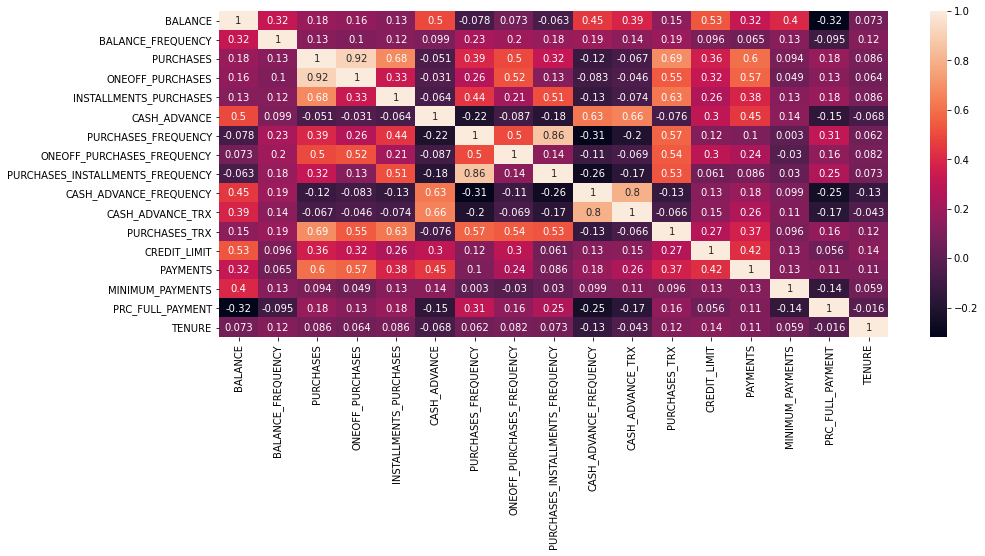

In [10]:
plt.figure(figsize=(15,6))
sns.heatmap(data_corr,annot=True)

In [11]:
data_train['BALANCE_FREQUENCY']=(data_train['BALANCE_FREQUENCY']+0.6).apply(np.floor)
data_train['PURCHASES_FREQUENCY']=(data_train['PURCHASES_FREQUENCY']+0.8).apply(np.floor)
data_train['ONEOFF_PURCHASES_FREQUENCY']=(data_train['ONEOFF_PURCHASES_FREQUENCY']+0.8).apply(np.floor)
data_train['PURCHASES_INSTALLMENTS_FREQUENCY']=(data_train['PURCHASES_INSTALLMENTS_FREQUENCY']+0.8).apply(np.floor)
data_train['PURCHASES_INSTALLMENTS_FREQUENCY']=(data_train['PURCHASES_INSTALLMENTS_FREQUENCY']+0.8).apply(np.floor)

In [12]:
data_train

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,1.0,95.40,0.00,95.40,0.000000,0.0,0.0,0.0,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,1.0,0.00,0.00,0.00,6442.945483,0.0,0.0,0.0,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.0,773.17,773.17,0.00,0.000000,1.0,1.0,0.0,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,1.0,1499.00,1499.00,0.00,205.788017,0.0,0.0,0.0,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.0,16.00,16.00,0.00,0.000000,0.0,0.0,0.0,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.0,291.12,0.00,291.12,0.000000,1.0,0.0,1.0,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.0,300.00,0.00,300.00,0.000000,1.0,0.0,1.0,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,1.0,144.40,0.00,144.40,0.000000,1.0,0.0,1.0,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,1.0,0.00,0.00,0.00,36.558778,0.0,0.0,0.0,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


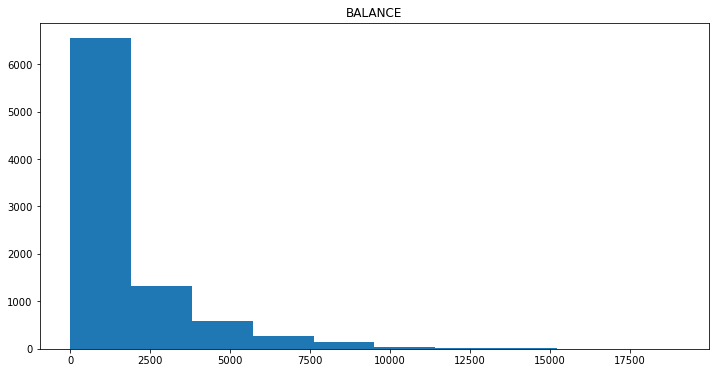

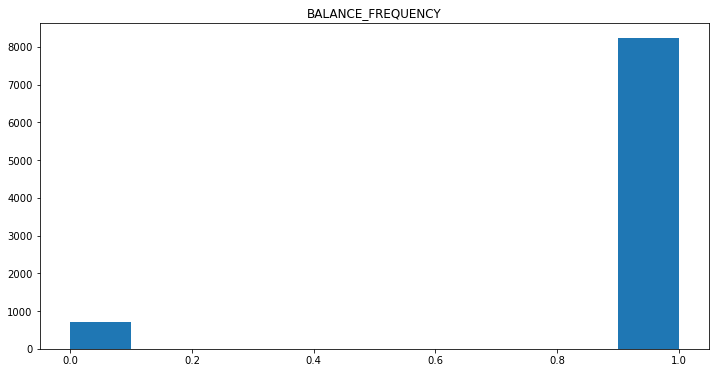

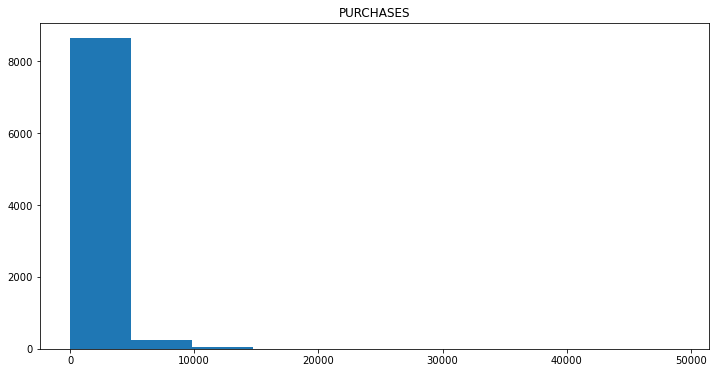

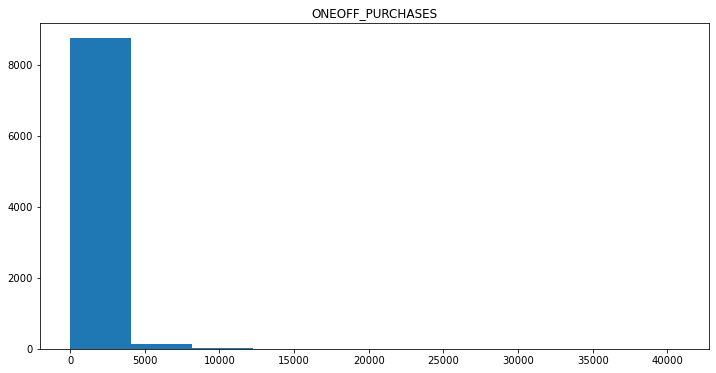

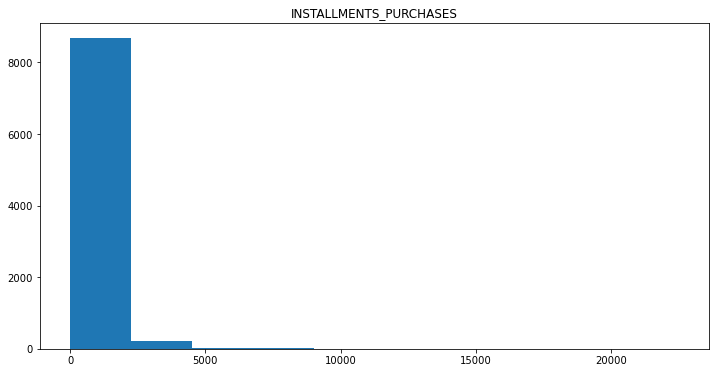

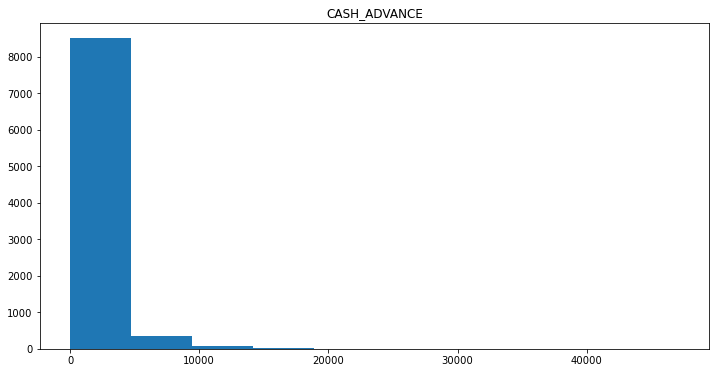

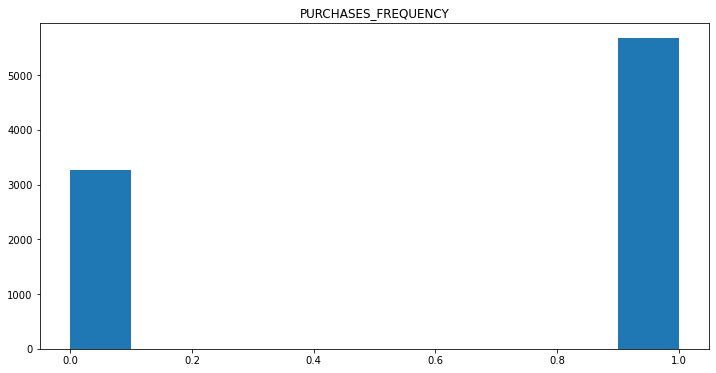

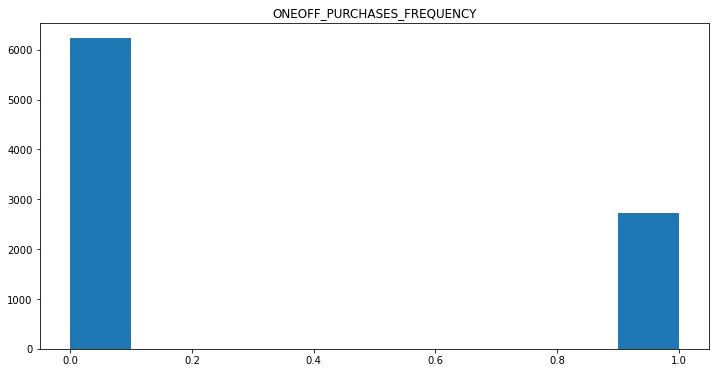

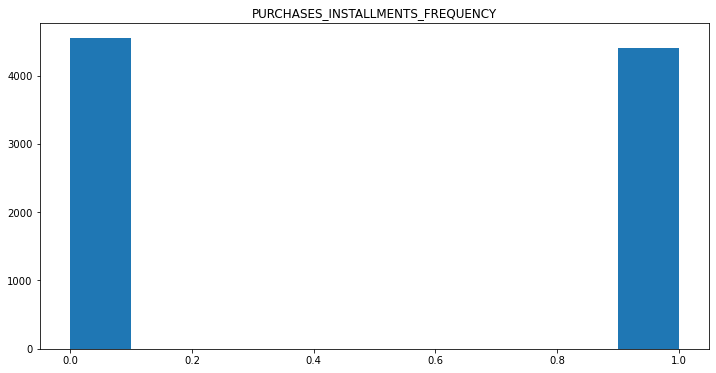

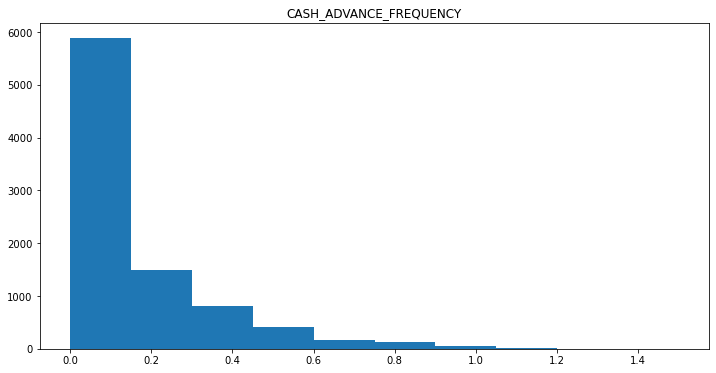

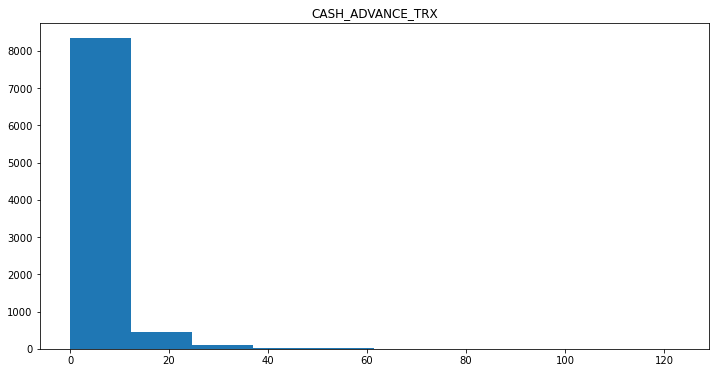

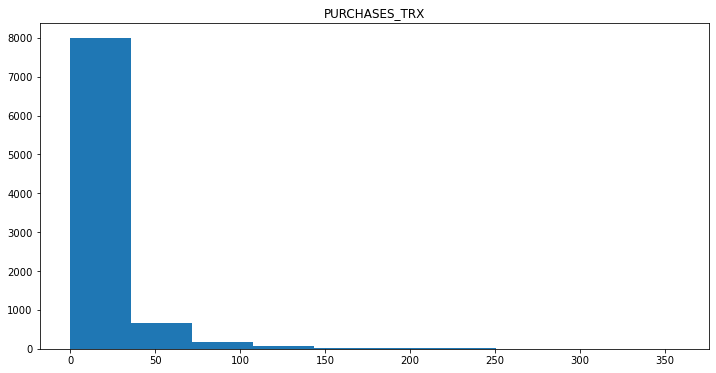

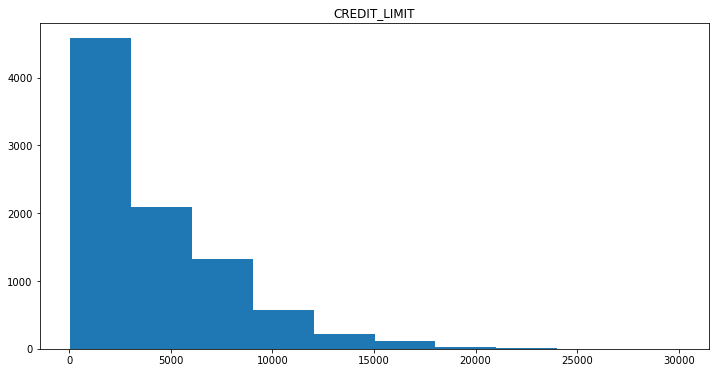

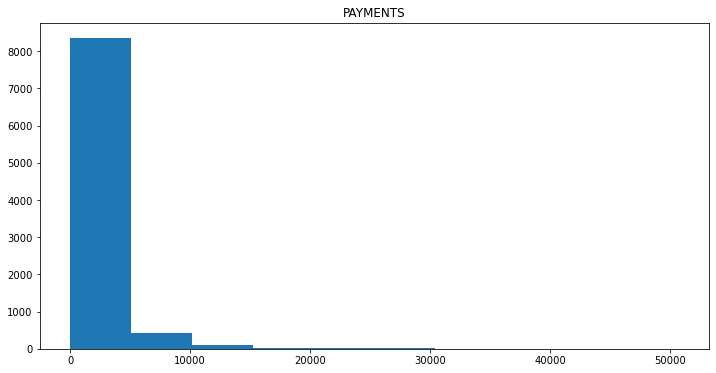

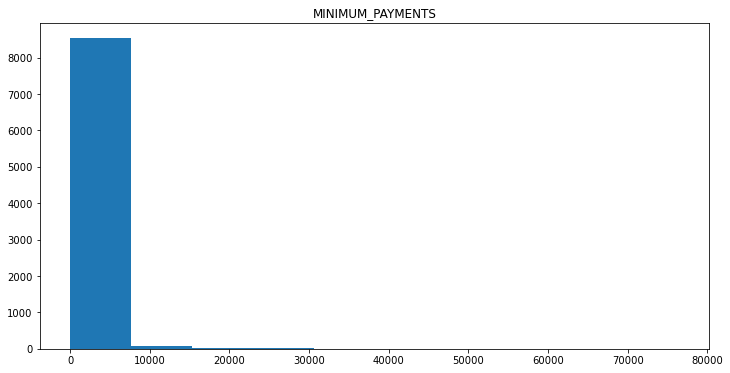

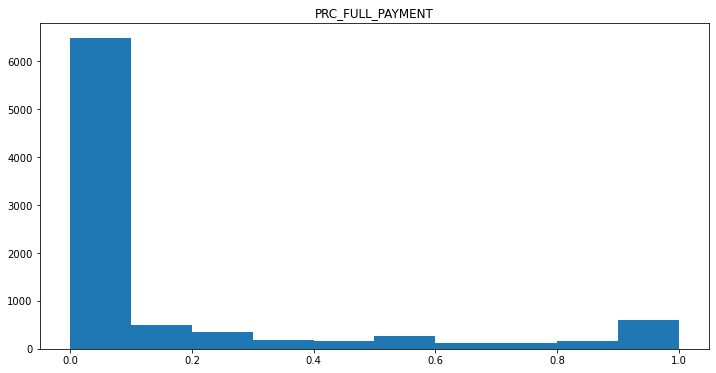

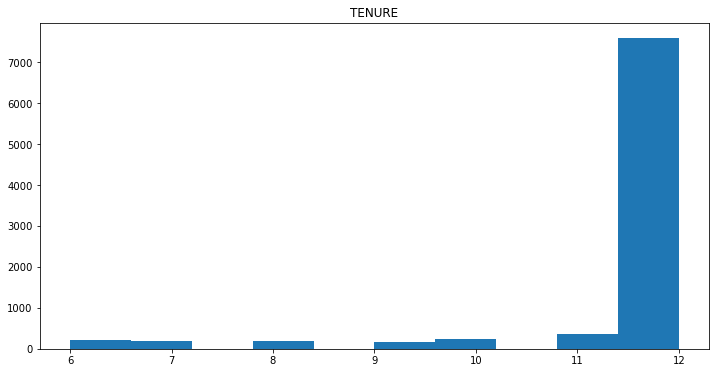

In [13]:
for columns in cols:
    plthist(columns)

In [14]:
def plthist(col_name):
    plt.figure(figsize=(12,6))
    plt.title(col_name)
    plt.hist(x=data_train[col_name])
    plt.plot()

In [15]:
data_train.dropna(axis=0,inplace=True)
data_train.drop('CUST_ID',axis=1,inplace=True)

In [16]:
cols=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

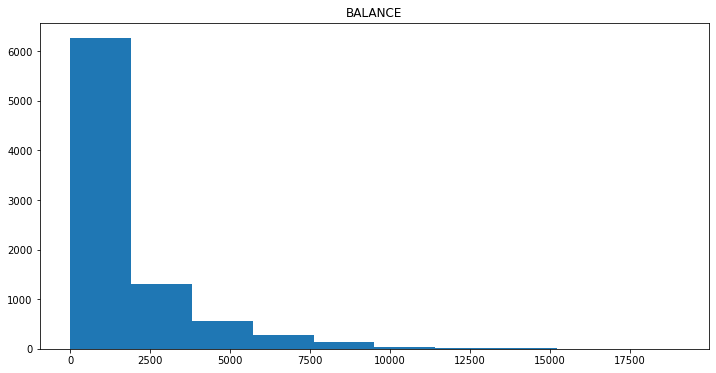

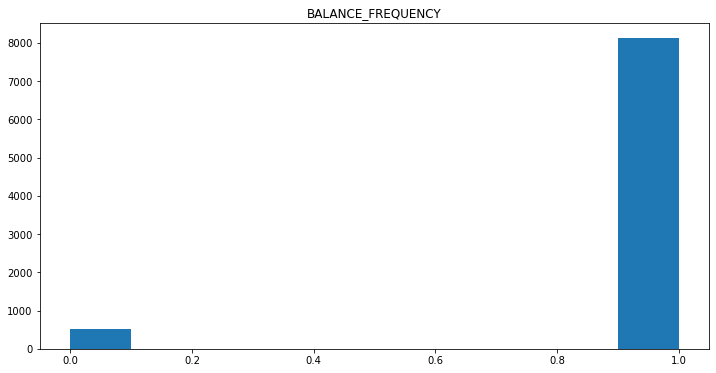

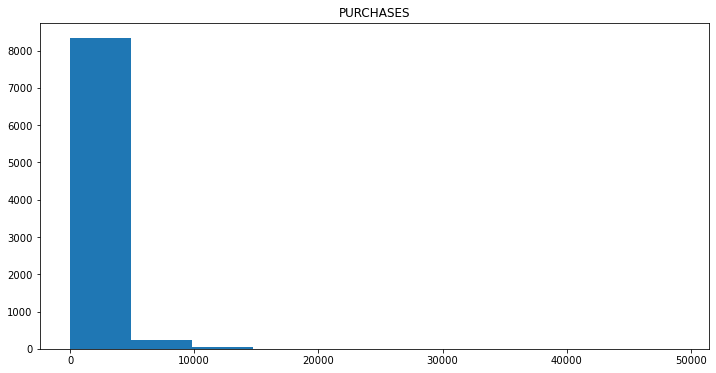

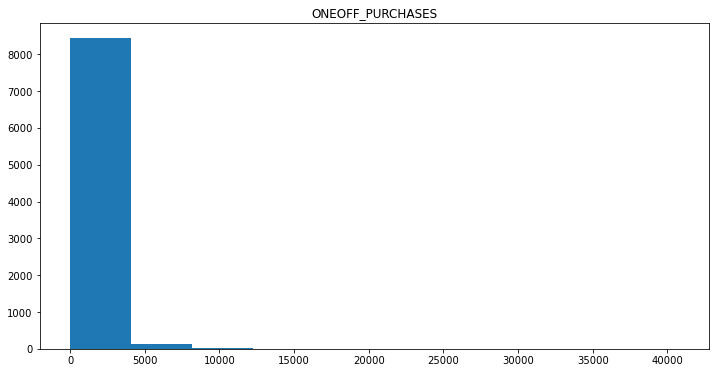

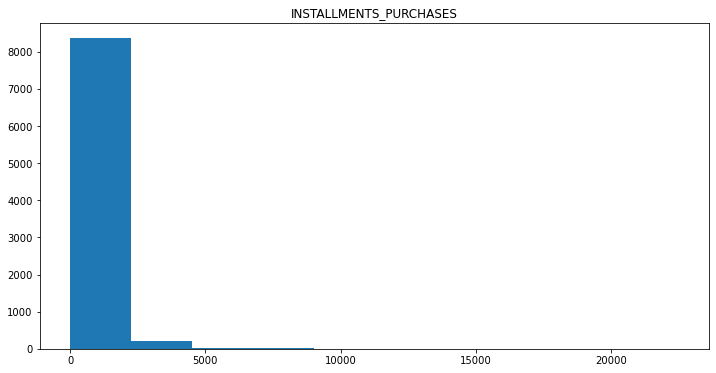

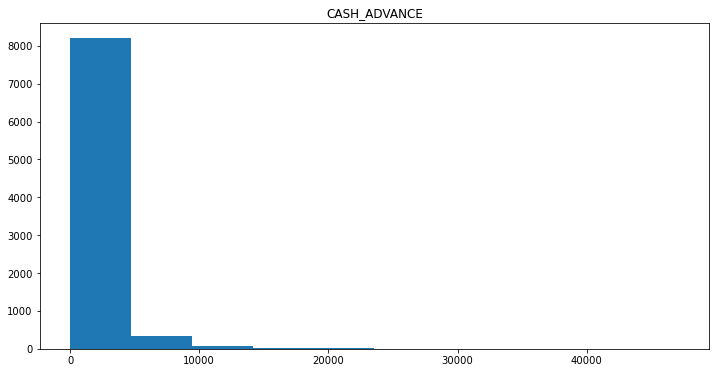

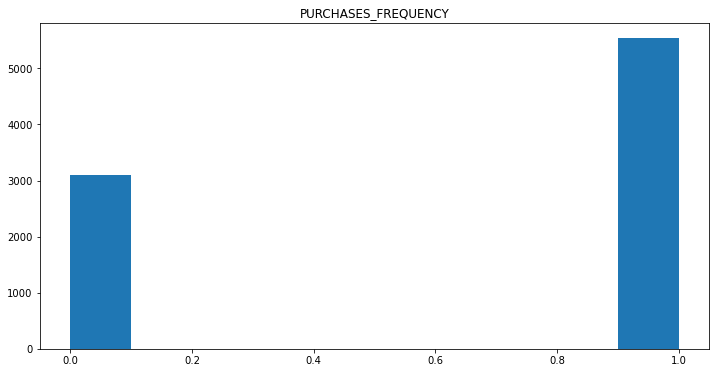

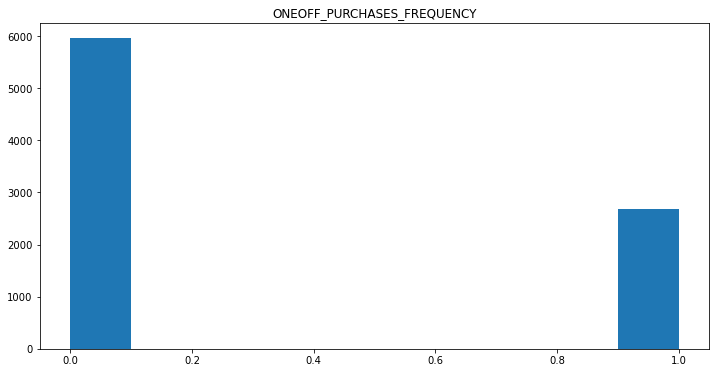

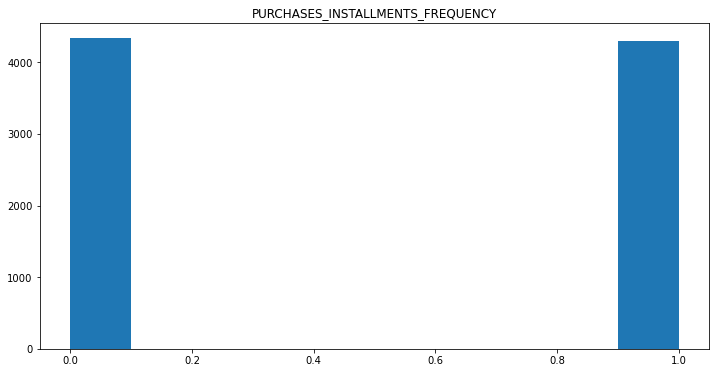

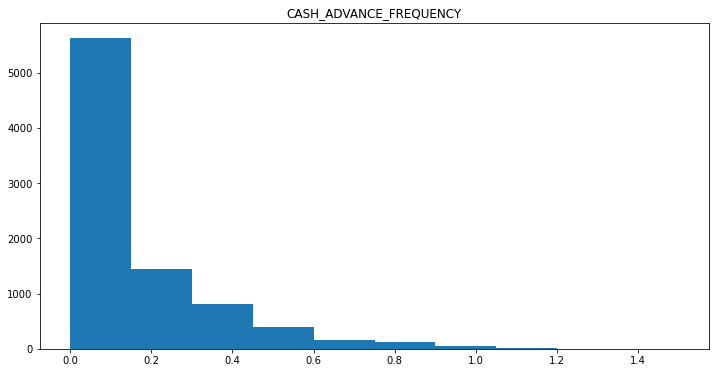

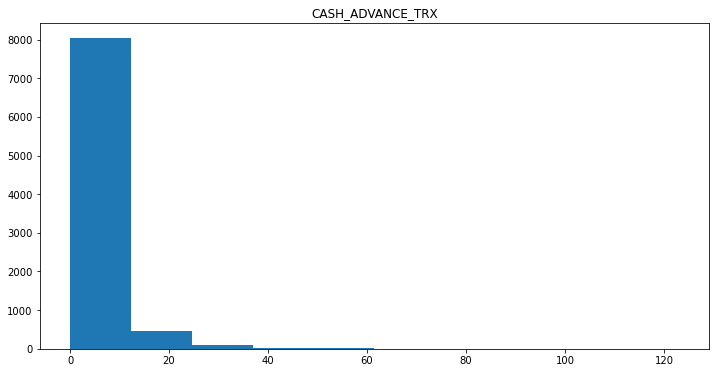

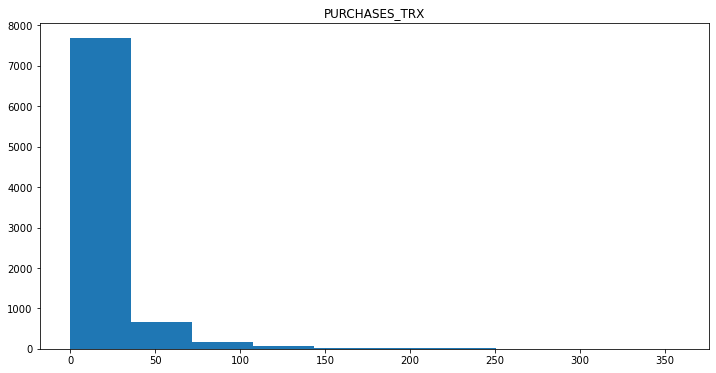

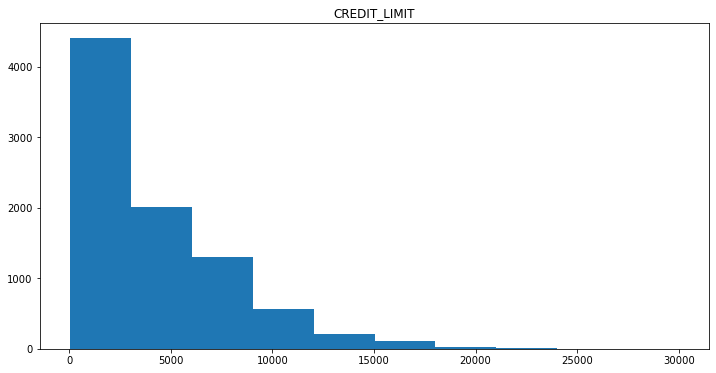

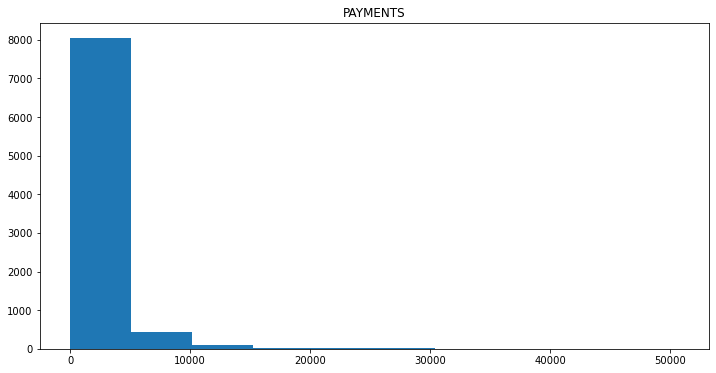

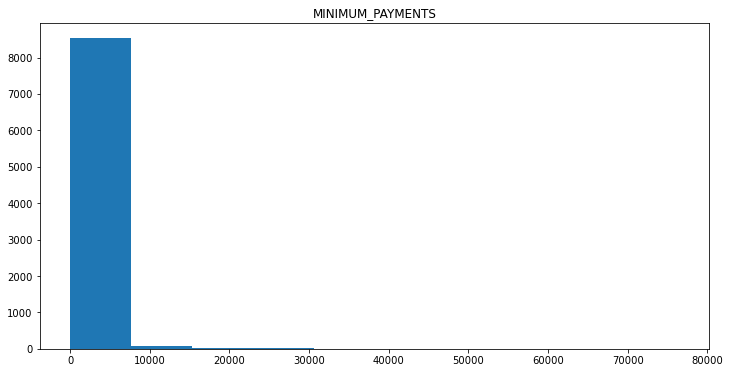

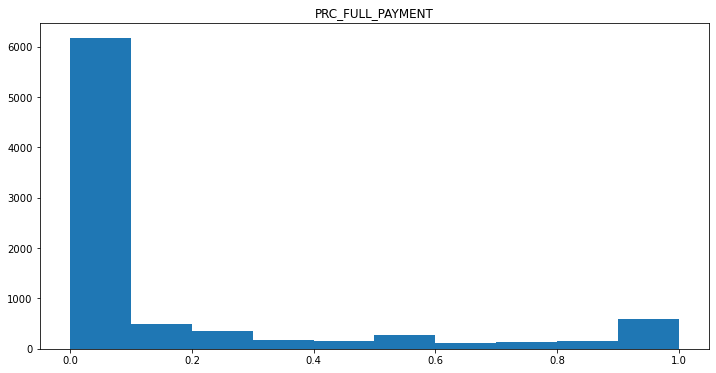

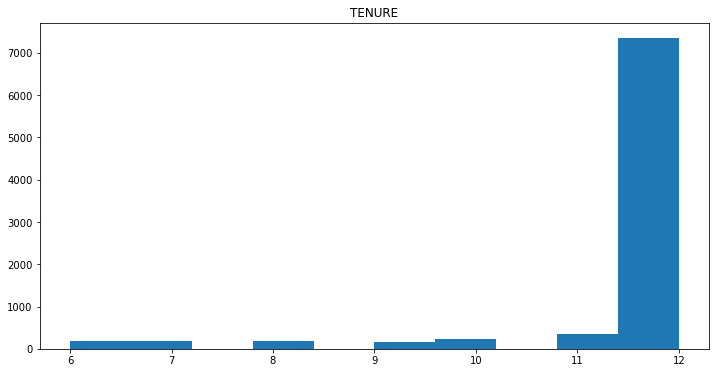

In [17]:
for columns in cols:
    plthist(columns)

In [18]:
def pltbox(col_name):
    plt.figure(figsize=(12,6))
    data_train.boxplot(column=col_name)

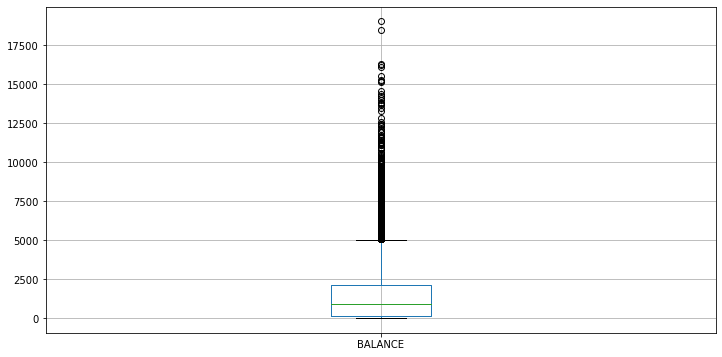

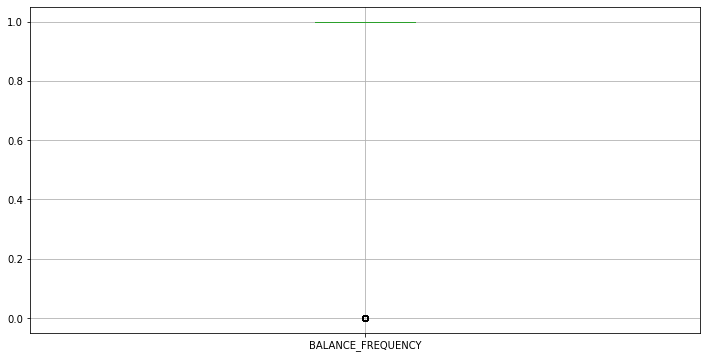

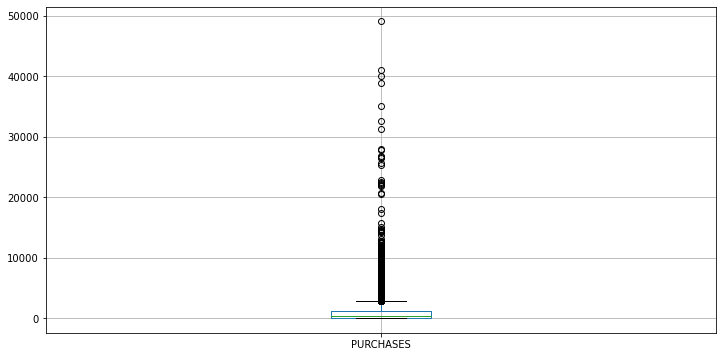

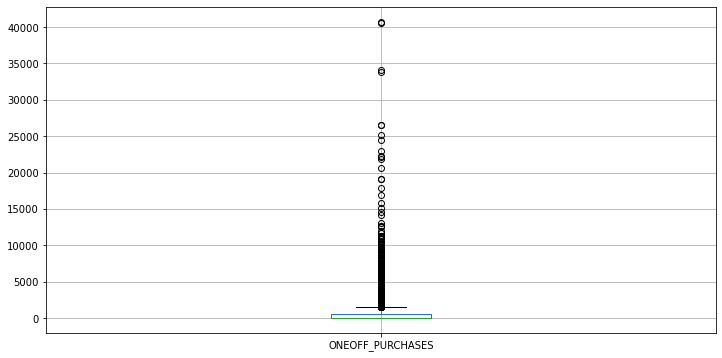

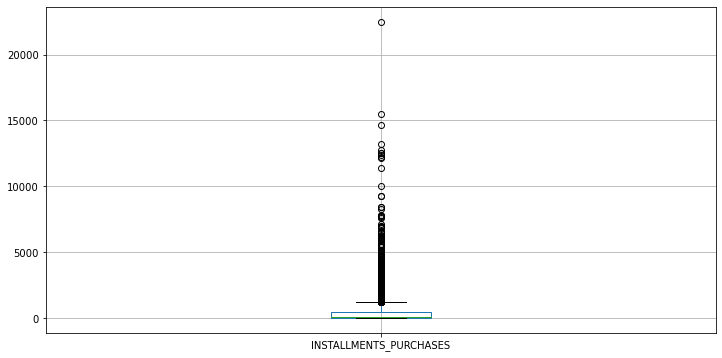

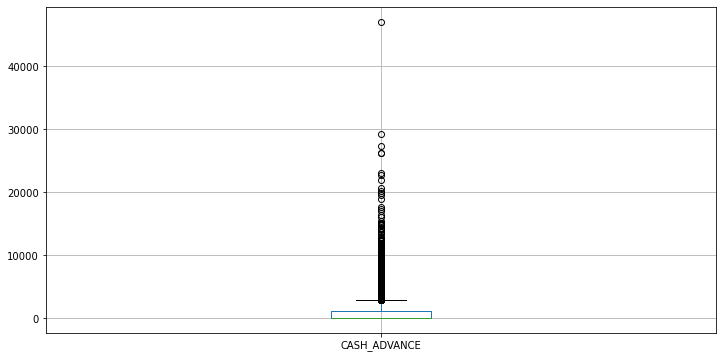

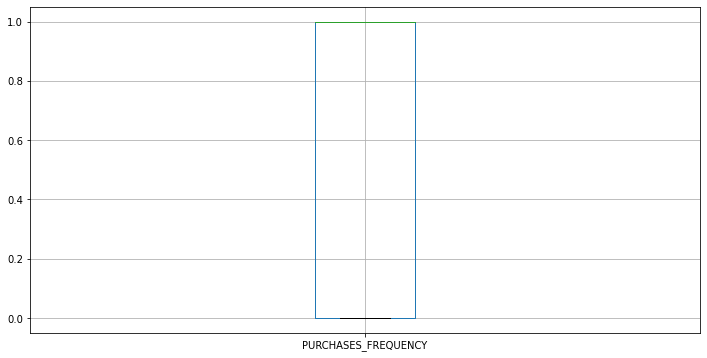

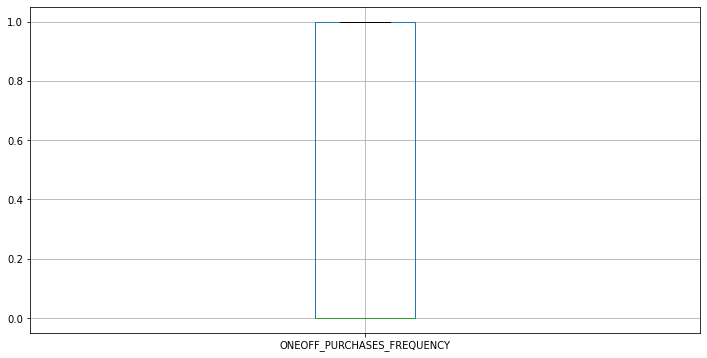

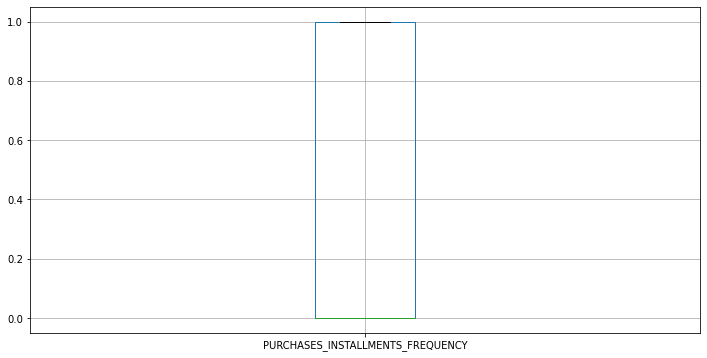

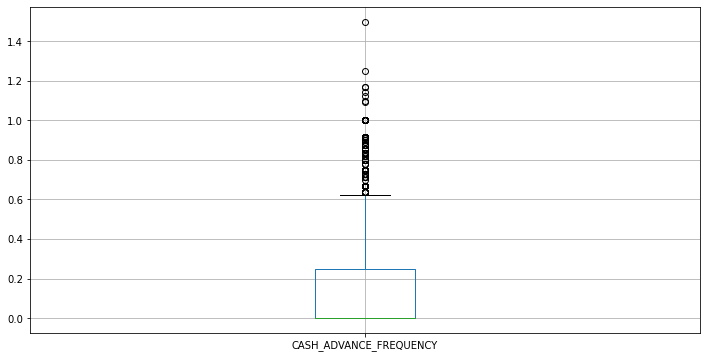

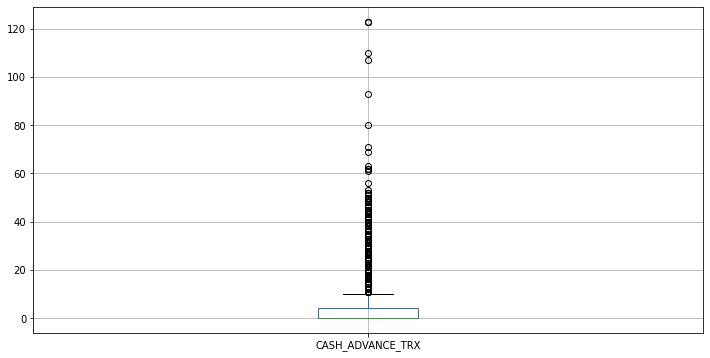

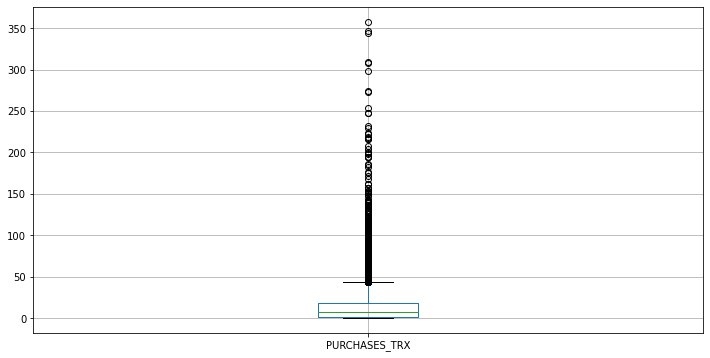

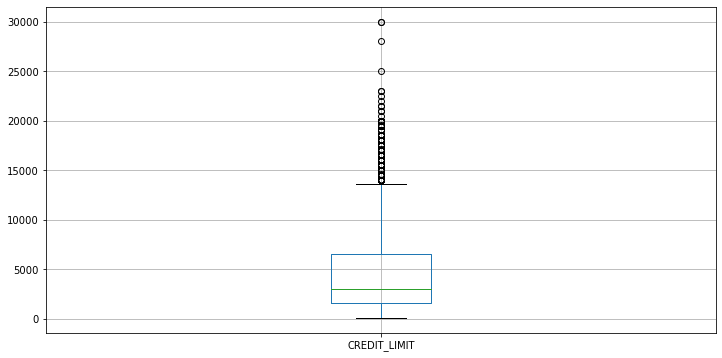

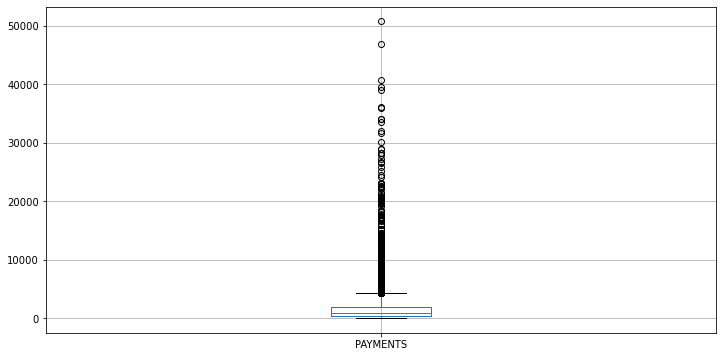

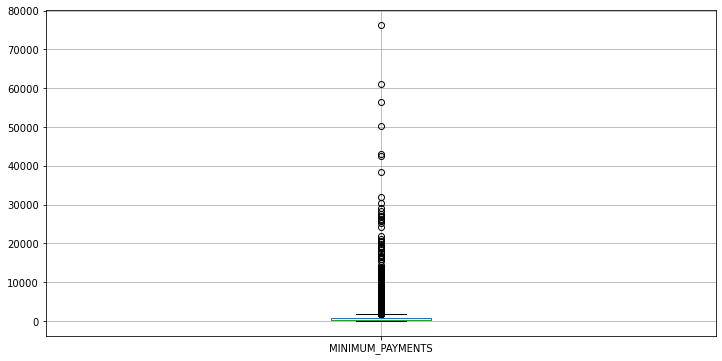

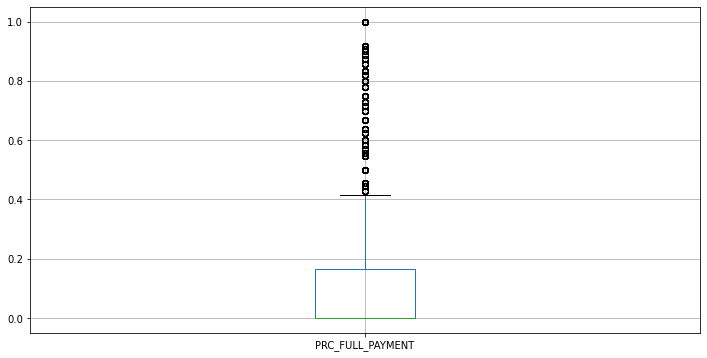

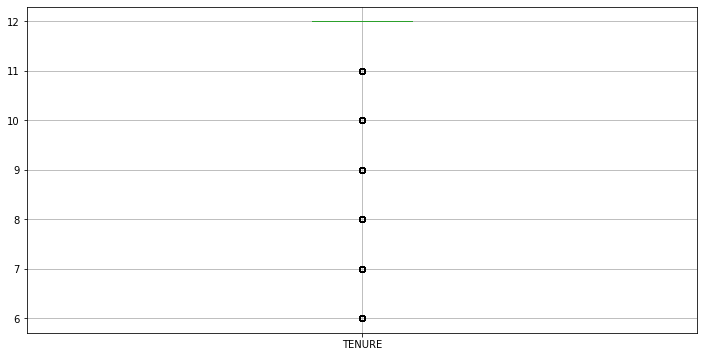

In [19]:
for columns in cols:
    pltbox(columns)

In [20]:
columnsn=['BALANCE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
data_dup=data_train[columnsn]
for col_name in columnsn:
    data_dup[col_name]=np.log(1+data_train[col_name])
remaingcol=['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','BALANCE_FREQUENCY']
for col_name in remaingcol:
    data_dup[col_name]=data_train[col_name]

<ipython-input-20-39cd573aa613>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dup[col_name]=np.log(1+data_train[col_name])
<ipython-input-20-39cd573aa613>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dup[col_name]=data_train[col_name]


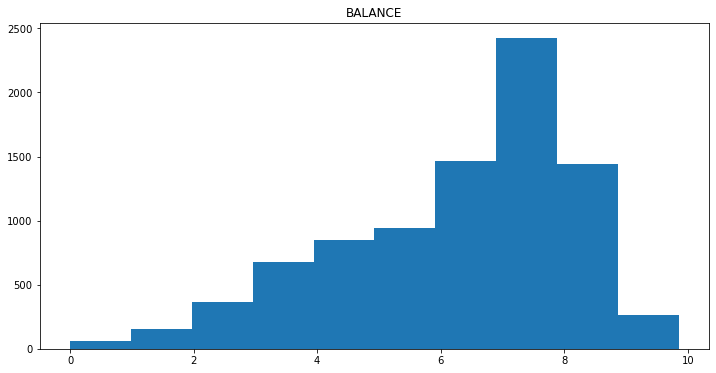

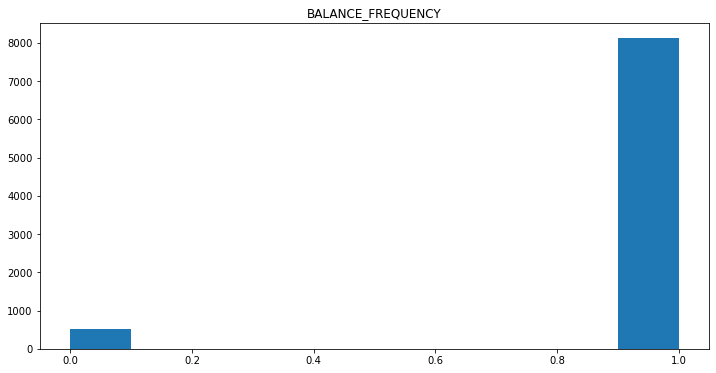

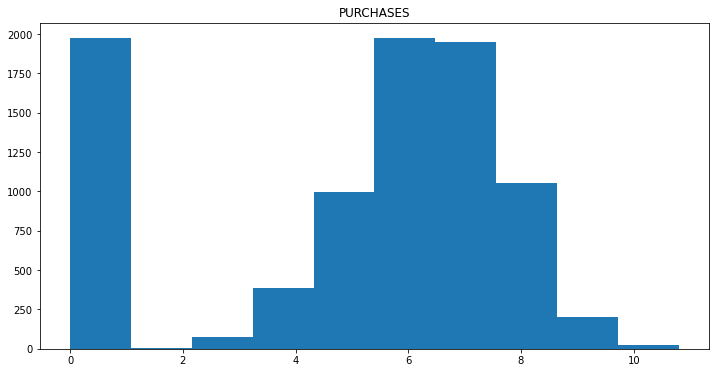

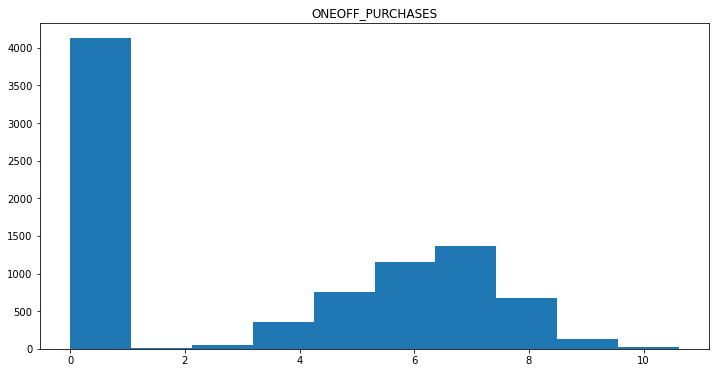

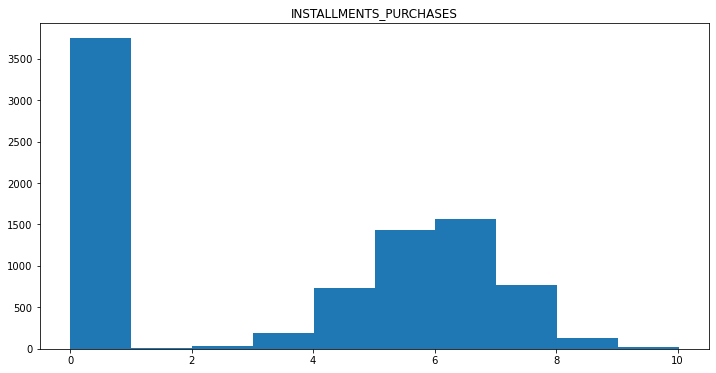

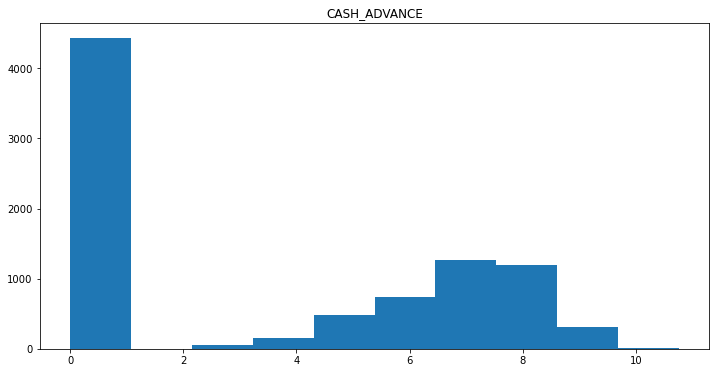

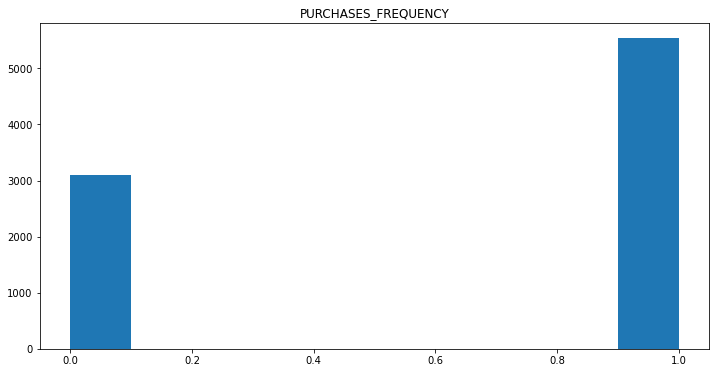

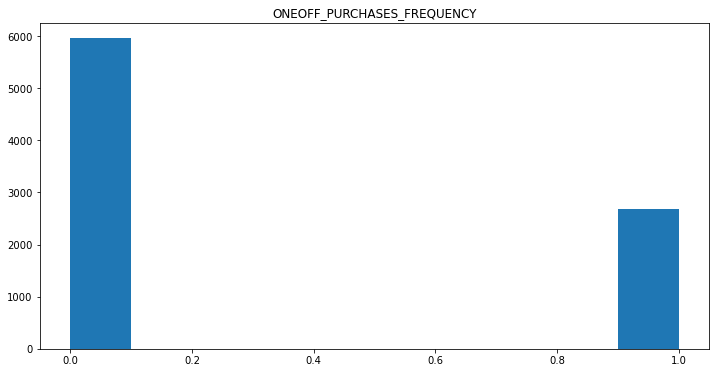

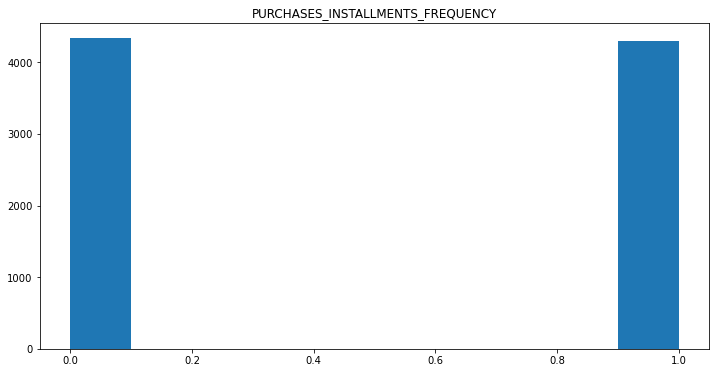

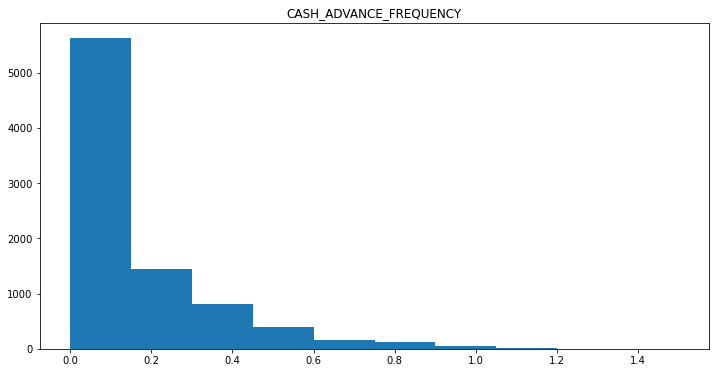

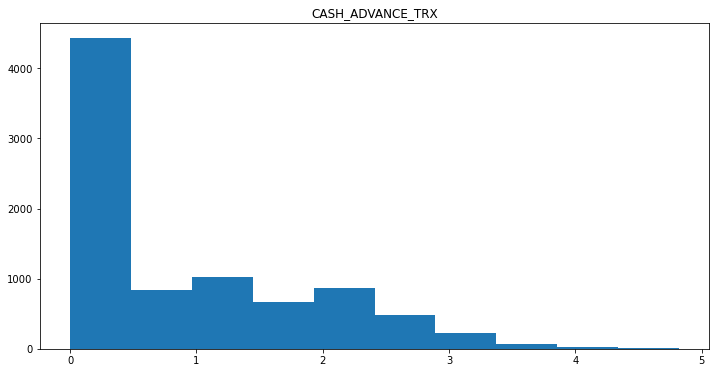

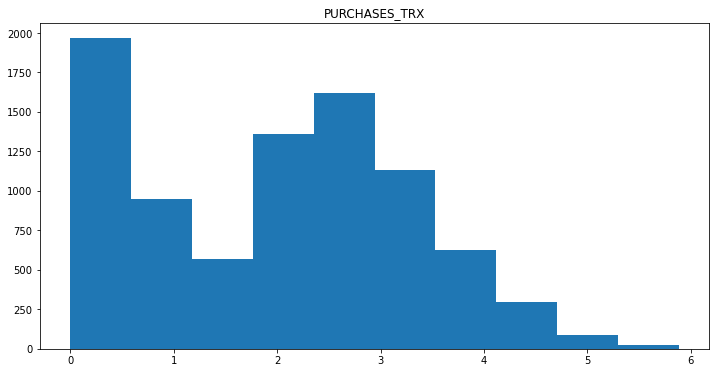

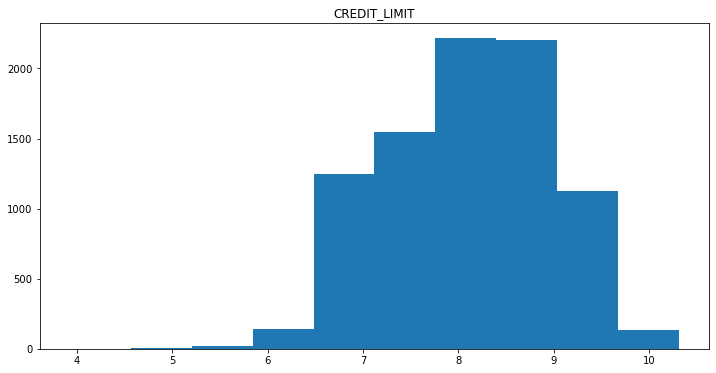

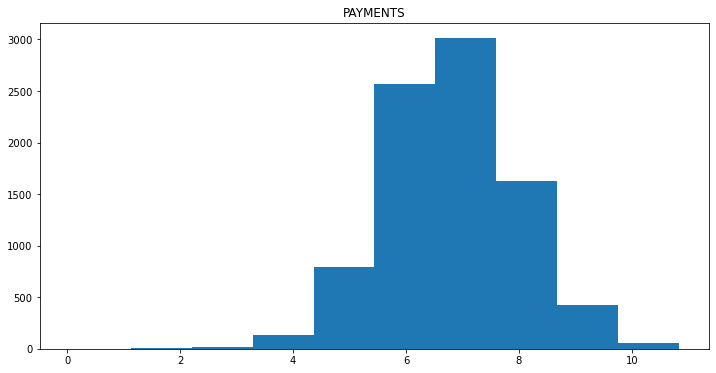

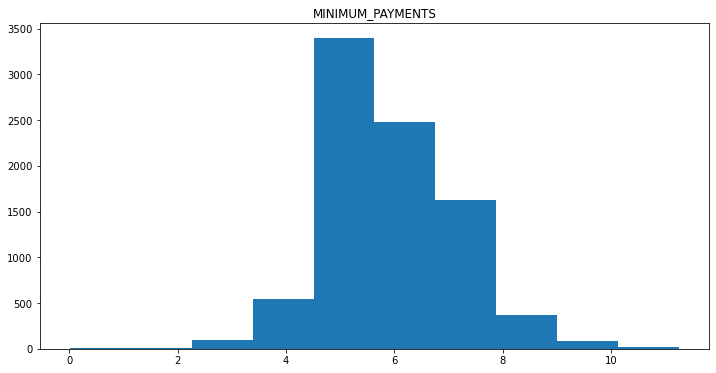

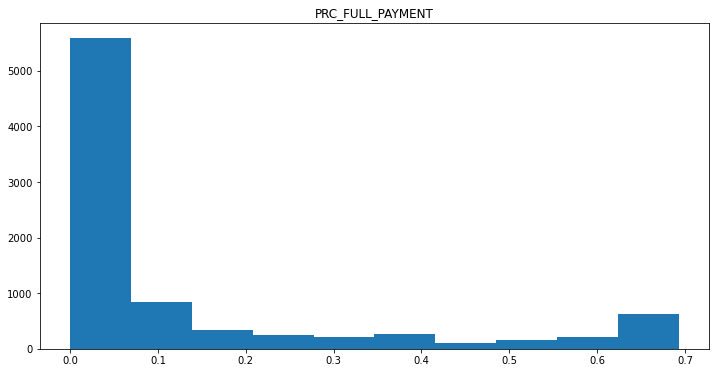

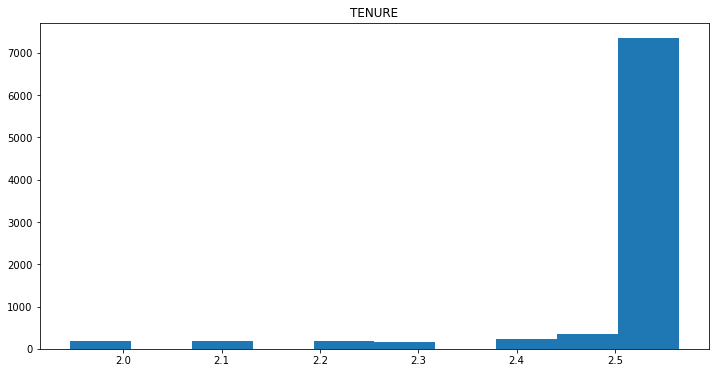

In [21]:
for col_name in cols:
    plt.figure(figsize=(12,6))
    plt.title(col_name)
    plt.hist(x=data_dup[col_name])
    plt.plot()

In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [23]:
pca = PCA(n_components=5,svd_solver='full')
X_data = pca.fit_transform(data_dup)

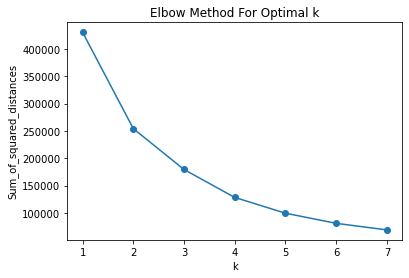

In [35]:
sum_of_squared_distance=[]
for k in range(1,8):
    kresult=KMeans(n_clusters=k, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kresult=kresult.fit(X_data)
    sum_of_squared_distance.append(kresult.inertia_)
    
plt.plot(range(1,8),sum_of_squared_distance,marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [36]:
kmeansc=KMeans(n_clusters=3)
kmeansc.fit(X_data)
print('Silhoutte score of our model is ' + str(silhouette_score(X_data, kmeansc.labels_)))

Silhoutte score of our model is 0.4129956105464954


In [37]:
data_train['cluster_id']=kmeansc.labels_

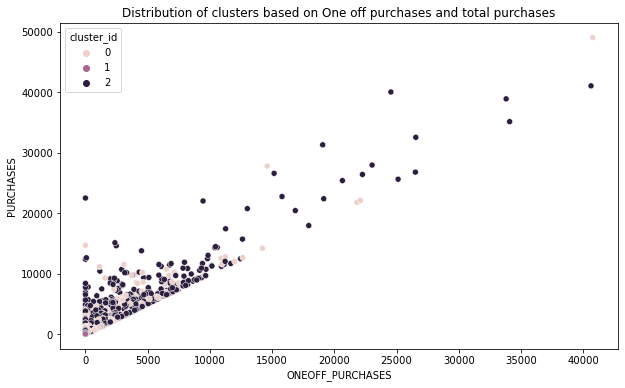

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_train, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

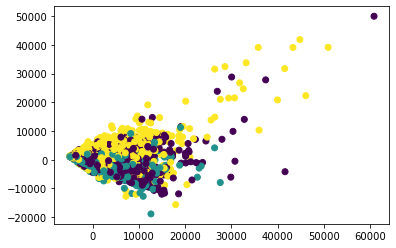

In [34]:
data_train['x'] = pca.fit_transform(data_train)[:, 0]
data_train['y'] = pca.fit_transform(data_train)[:, 1]
plt.scatter(data_train['x'], data_train['y'], c=data_train['cluster_id'])
plt.show()